In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data1 = pd.read_pickle(r'data\subject101.pkl')
data2 = pd.read_pickle(r'data\subject102.pkl')


In [3]:
vals = ['standing', 'walking','running','cycling']
data1 = data1.loc[data1['activity'].isin(vals)].copy()
data2 = data2.loc[data2['activity'].isin(vals)].copy()

In [4]:
data1.drop(data1[data1.activity=='running'].iloc[:1000].index, inplace=True)
data1.drop(data1[data1.activity=='running'].iloc[-1000:].index, inplace=True)
data1.drop(data1[data1.activity=='walking'].iloc[:1000].index, inplace=True)
data1.drop(data1[data1.activity=='walking'].iloc[-1000:].index, inplace=True)
data1.drop(data1[data1.activity=='cycling'].iloc[:1000].index, inplace=True)
data1.drop(data1[data1.activity=='cycling'].iloc[-1000:].index, inplace=True)
data1.drop(data1[data1.activity=='standing'].iloc[:1000].index, inplace=True)
data1.drop(data1[data1.activity=='standing'].iloc[-1000:].index, inplace=True)

In [5]:
data2.drop(data2[data2.activity=='running'].iloc[:1000].index, inplace=True)
data2.drop(data2[data2.activity=='running'].iloc[-1000:].index, inplace=True)
data2.drop(data2[data2.activity=='walking'].iloc[:1000].index, inplace=True)
data2.drop(data2[data2.activity=='walking'].iloc[-1000:].index, inplace=True)
data2.drop(data2[data2.activity=='cycling'].iloc[:1000].index, inplace=True)
data2.drop(data2[data2.activity=='cycling'].iloc[-1000:].index, inplace=True)
data2.drop(data2[data2.activity=='standing'].iloc[:1000].index, inplace=True)
data2.drop(data2[data2.activity=='standing'].iloc[-1000:].index, inplace=True)

In [6]:
data1.activityID.value_counts()

6    21492
3    19593
4    19383
5    18684
Name: activityID, dtype: int64

In [7]:
def absacc(row):
    return np.sqrt(row['IMU_chest_ax1']**2 + row['IMU_chest_ay1']**2 + row['IMU_chest_az1']**2)/9.806

In [8]:
data1['absacc'] = data1.apply(absacc, axis=1)
data2['absacc'] = data2.apply(absacc, axis=1)



<IPython.core.display.Javascript object>


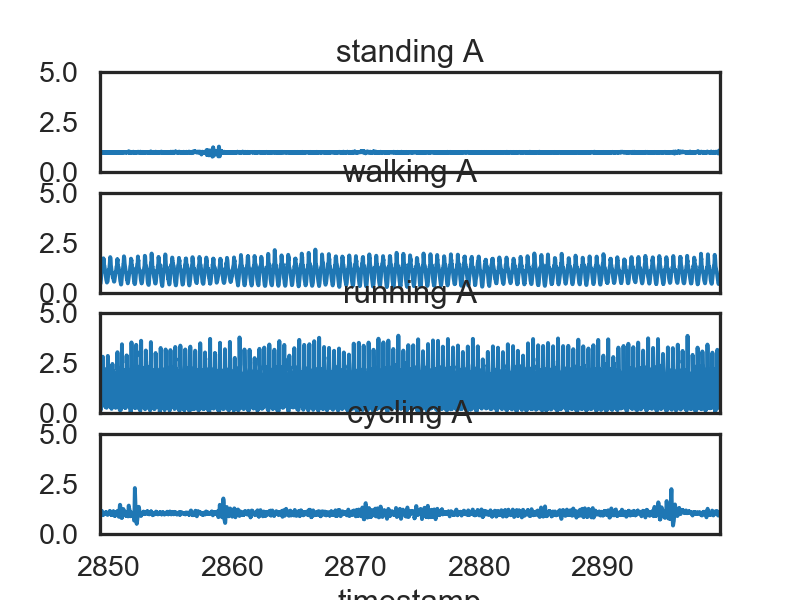

C:\Users\meesh\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


In [9]:
# Let's take a look
fig, ax = plt.subplots(4)
data1.absacc[data1.activityID==3].iloc[0:5000].plot(ax=ax[0],ylim=(0,5)); ax[0].set_title('standing A'); 
#data2.absacc[data2.activityID==3].plot(ax=ax[1]); ax[1].set_title('standing B');
data1.absacc[data1.activityID==4].iloc[0:5000].plot(ax=ax[1],ylim=(0,5)); ax[1].set_title('walking A'); 
#data2.absacc[data2.activityID==4].plot(ax=ax[3]); ax[3].set_title('walking B');
data1.absacc[data1.activityID==5].iloc[0:5000].plot(ax=ax[2],ylim=(0,5)); ax[2].set_title('running A');
data1.absacc[data1.activityID==6].iloc[0:5000].plot(ax=ax[3],ylim=(0,5)); ax[3].set_title('cycling A');
plt.tight_layout()

plt.savefig(r'images\acc_sub_a.png')

<IPython.core.display.Javascript object>


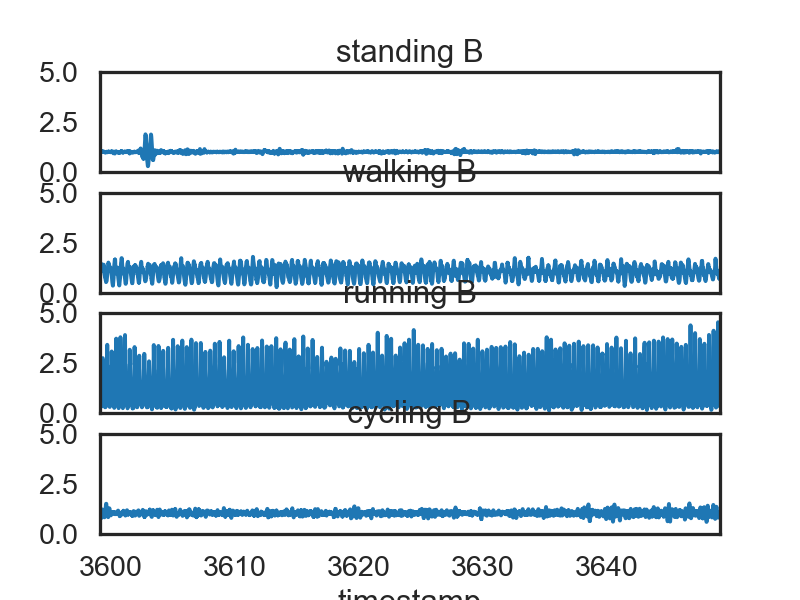

C:\Users\meesh\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


In [10]:
fig, ax = plt.subplots(4)

data2.absacc[data2.activityID==3].iloc[100:5000].plot(ax=ax[0],ylim=(0,5)); ax[0].set_title('standing B'); 
data2.absacc[data2.activityID==4].iloc[100:5000].plot(ax=ax[1],ylim=(0,5)); ax[1].set_title('walking B'); 
data2.absacc[data2.activityID==5].iloc[100:5000].plot(ax=ax[2],ylim=(0,5)); ax[2].set_title('running B');
data2.absacc[data2.activityID==6].iloc[100:5000].plot(ax=ax[3],ylim=(0,5)); ax[3].set_title('cycling B');
plt.tight_layout()
plt.savefig(r'images\acc_sub_b.png')

<IPython.core.display.Javascript object>


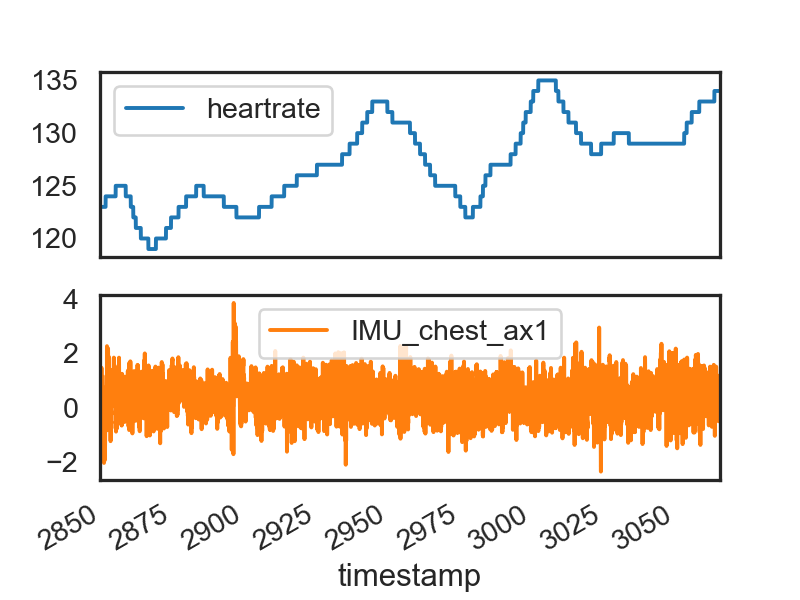

<IPython.core.display.Javascript object>


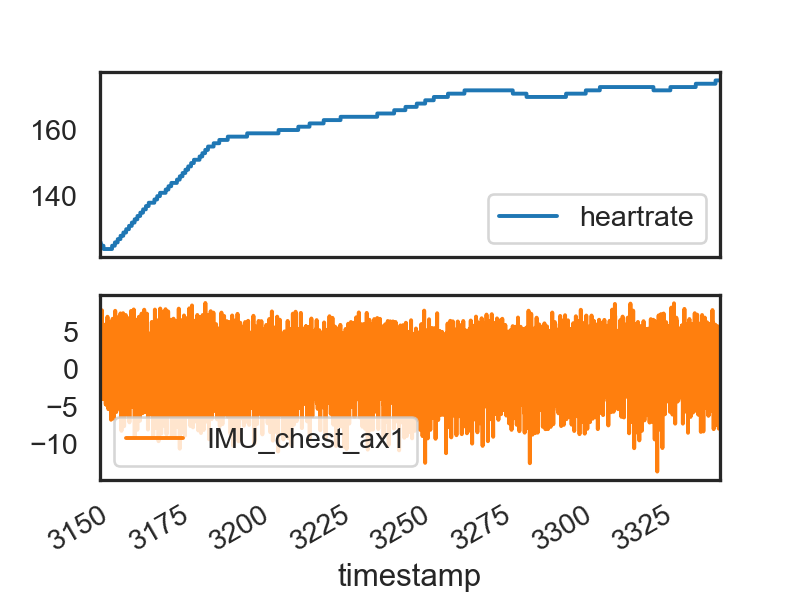

<IPython.core.display.Javascript object>


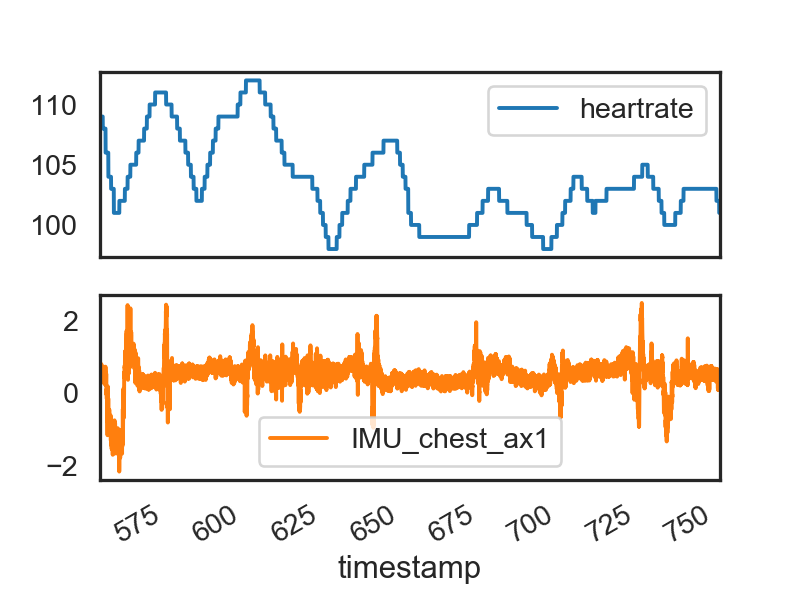

<IPython.core.display.Javascript object>


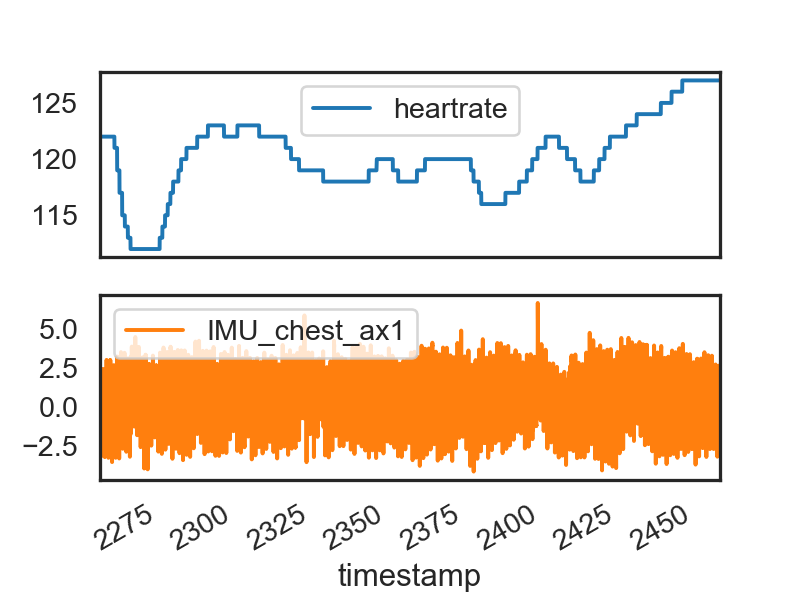

activity
cycling     [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
running     [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
standing    [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
walking     [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
dtype: object

In [11]:
feats = ['heartrate','IMU_chest_ax1','activity']
dt = data1[feats]
dac = dt.groupby('activity')

dac.plot(subplots=True, legend=True)

<IPython.core.display.Javascript object>


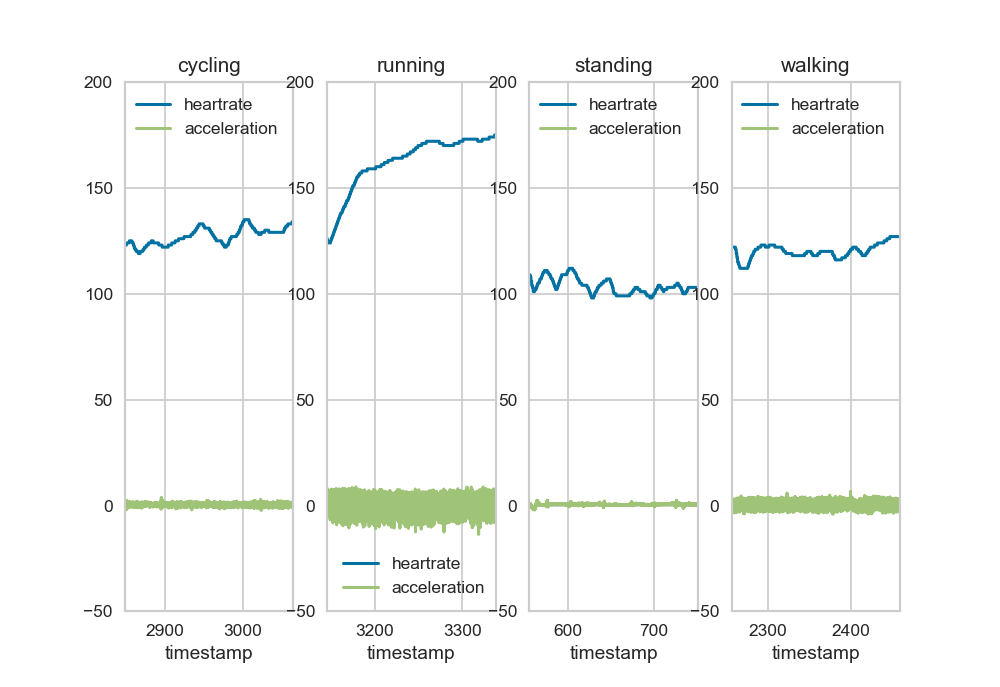

In [44]:
plt.figure()

# Iterate through activities

for i, (ac_name, ac_gdf) in enumerate(dac):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(1,4, i + 1) # nrows, ncols, axes position
    # plot the activity on these axes
    ac_gdf.plot(ax=ax, ylim=(-50,200))
    # set the title
    ax.set_title(ac_name)
    ax.legend(["heartrate", "acceleration"])
    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')


plt.show()
plt.savefig(r'images\act_comp.png')

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.features.importances import FeatureImportances

In [14]:


# Create a new matplotlib figure
#fig = plt.figure()
#ax = fig.add_subplot()

#viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
#viz.fit(dt, data1.activity)
#viz.poof()

In [56]:
labels=data1.activity.unique()
labels

array(['standing', 'walking', 'cycling', 'running'], dtype=object)

In [15]:
import pickle
# Load data (deserialize)
with open(r'data\2featclass.pickle', 'rb') as handle:
    dict_2class = pickle.load(handle)

In [16]:
et_y_true = dict_2class['Extra Trees']['y_true']
et_y_pred = dict_2class['Extra Trees']['y_pred']

In [63]:
def cm_vizu(dictt,classf,labels):
    y_true = dictt[classf]['y_true']
    y_pred = dictt[classf]['y_pred']
    cm = confusion_matrix(y_true,y_pred,  labels=labels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(cm_normalized, annot=True, fmt=".4f",
                cmap='Blues', square=True,
                xticklabels=labels,
                yticklabels=labels)
    ax.set_xlabel('Predicted Activity')
    ax.set_ylabel('True Activity')
    plt.title(classf, fontsize = 15)
    plt.tight_layout()

<IPython.core.display.Javascript object>


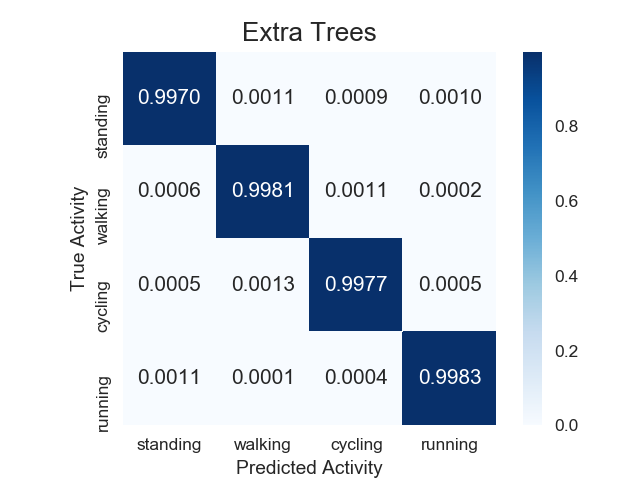

In [64]:
cm_vizu(dict_2class,'Extra Trees',labels)
#plt.savefig(r'images\et_cm.png')

In [47]:
print(classification_report(et_y_true,et_y_pred))

              precision    recall  f1-score   support

     cycling       1.00      1.00      1.00     48271
     running       1.00      1.00      1.00     27783
    standing       1.00      1.00      1.00     56138
     walking       1.00      1.00      1.00     68132

   micro avg       1.00      1.00      1.00    200324
   macro avg       1.00      1.00      1.00    200324
weighted avg       1.00      1.00      1.00    200324



In [20]:
cls = [key for key in dict_2class.keys()]
accuracy_score = [dict_2class[key]['accuracy_score'] for key in cls]

In [32]:
xx = dict(zip(cls, accuracy_score))
sorted_x = sorted(xx.items(), key=lambda kv: kv[1])

import collections
sorted_dict = collections.OrderedDict(sorted_x)

OrderedDict([('Logistic Regression', 0.850597032806853),
             ('Naive Bayes', 0.8750923503923643),
             ('Neural Net', 0.9156716119885785),
             ('AdaBoost', 0.9171542101795092),
             ('Stochastic Gradient Boosting', 0.9457379045945569),
             ('Nearest Neighbors', 0.9829426329346459),
             ('Random Forest10', 0.991503763902478),
             ('Decision Tree', 0.9964008306543399),
             ('RF', 0.9969299734430223),
             ('Bagged Decision Trees', 0.9969948683133324),
             ('Extra Trees', 0.9977037199736427)])

<IPython.core.display.Javascript object>


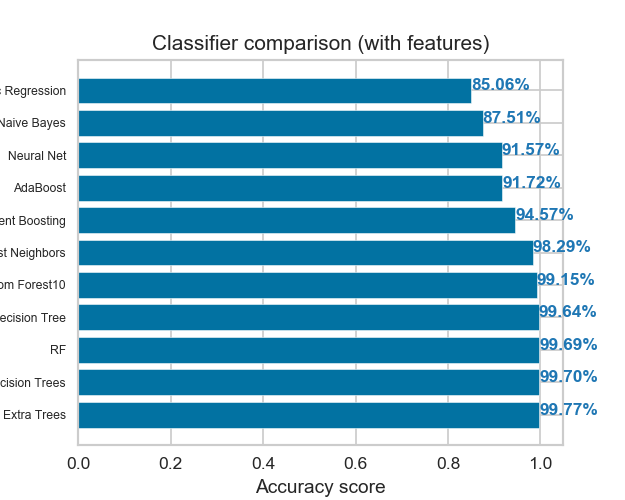

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text yticklabel objects>)

In [43]:
yy= [key for key in sorted_dict.keys()]
xx= [sorted_dict[key] for key in yy]

fig, ax = plt.subplots(figsize=(5,4))
y_pos = np.arange(len(yy))
ax.barh(y_pos, xx, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(yy)
ax.invert_yaxis()  # labels read top-to-bottom
[ax.text(v, i, '{:.2f}%'.format(100*v),fontsize=10,color='tab:blue',weight='bold') for i, v in enumerate(xx)];
ax.set_xlabel('Accuracy score')
ax.set_title('Classifier comparison (with features)')
plt.yticks(fontsize=7)
plt.savefig(r'images\classifier_comp.png')

In [78]:
# Load data (deserialize)
with open(r'data\loso_class.pickle', 'rb') as handle:
    loso = pickle.load(handle)
    
# Load data (deserialize)
with open(r'data\cross_class.pickle', 'rb') as handle:
    cross = pickle.load(handle)
    
# Load data (deserialize)
with open(r'data\sub106_class.pickle', 'rb') as handle:
    s106 = pickle.load(handle)

<IPython.core.display.Javascript object>


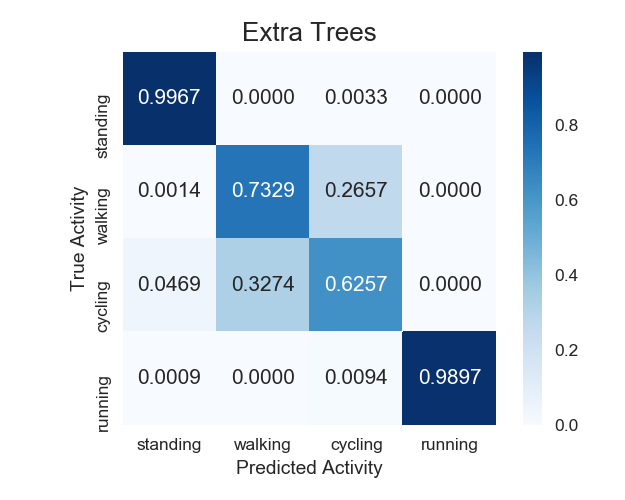

In [79]:
cm_vizu(loso,'Extra Trees',labels)
plt.savefig(r'images\et_cm_loso.png')

<IPython.core.display.Javascript object>


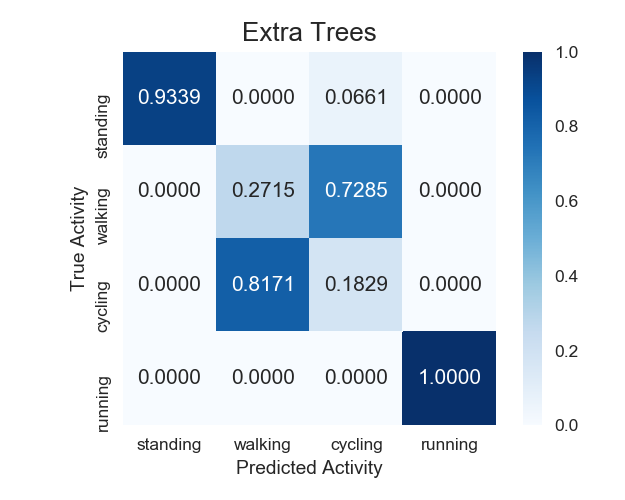

In [80]:
cm_vizu(cross,'Extra Trees',labels)
plt.savefig(r'images\et_cm_cross.png')

<IPython.core.display.Javascript object>


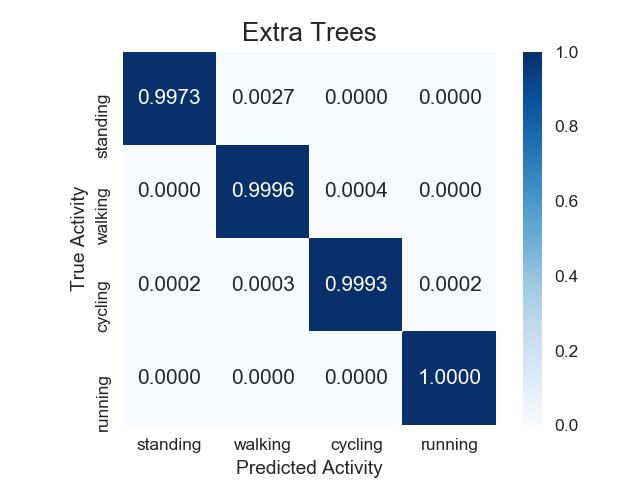

In [81]:
cm_vizu(s106,'Extra Trees',labels)
plt.savefig(r'images\et_cm_s106.png')

In [82]:
print(classification_report(loso['Extra Trees']['y_true'],loso['Extra Trees']['y_pred']))

                   precision    recall  f1-score   support

   Nordic walking       0.30      0.35      0.32     15172
 ascending stairs       0.27      0.17      0.21     21094
          cycling       0.26      0.23      0.25     24110
descending stairs       0.56      0.81      0.66      8561
          ironing       0.73      0.72      0.73     21386
            lying       0.41      0.68      0.51     14937
     rope jumping       1.00      0.91      0.96     10626
          running       1.00      0.95      0.97     19125
          sitting       0.38      0.37      0.37     21619
         standing       0.38      0.28      0.32     25522
  vacuum cleaning       0.53      0.48      0.50     22685
          walking       0.28      0.43      0.34     12239

        micro avg       0.49      0.49      0.49    217076
        macro avg       0.51      0.53      0.51    217076
     weighted avg       0.49      0.49      0.48    217076



In [83]:
print(classification_report(cross['Extra Trees']['y_true'],cross['Extra Trees']['y_pred']))

C:\Users\meesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\meesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                   precision    recall  f1-score   support

   Nordic walking       0.01      0.15      0.02      1374
 ascending stairs       0.09      0.16      0.12      7414
          cycling       0.19      0.08      0.11     48917
descending stairs       0.47      0.38      0.42     15487
          ironing       0.89      0.66      0.75     28351
            lying       0.55      0.80      0.65     16793
     rope jumping       0.00      0.00      0.00         0
          running       1.00      0.97      0.99     18656
          sitting       0.14      0.21      0.17     13665
         standing       0.46      0.29      0.35     30317
  vacuum cleaning       0.85      0.54      0.66     32081
          walking       0.02      0.11      0.04      4021

        micro avg       0.42      0.42      0.42    217076
        macro avg       0.39      0.36      0.36    217076
     weighted avg       0.52      0.42      0.45    217076



C:\Users\meesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [84]:
print(classification_report(s106['Extra Trees']['y_true'],s106['Extra Trees']['y_pred']))

                   precision    recall  f1-score   support

   Nordic walking       1.00      0.99      0.99      4817
 ascending stairs       0.99      0.99      0.99      3732
          cycling       1.00      1.00      1.00      5786
descending stairs       0.99      1.00      0.99      3394
          ironing       1.00      0.99      0.99       894
            lying       0.99      0.98      0.99      1083
     rope jumping       0.99      1.00      1.00      5493
          running       1.00      1.00      1.00      4487
          sitting       0.99      0.99      0.99       849
         standing       1.00      0.98      0.99       375
  vacuum cleaning       1.00      0.99      0.99      1976
          walking       1.00      1.00      1.00      6925

        micro avg       1.00      1.00      1.00     39811
        macro avg       0.99      0.99      0.99     39811
     weighted avg       1.00      1.00      1.00     39811

